# Interpretation der Ergebnisse der Durchläufe der verschiedenen Versuchspläne

In [1]:
import arrow
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
from matplotlib import rc
rc('text', usetex=True)

In [3]:
%run -i ./scripts/setConfigs.py

Set configs..


## Read Versuchsplan results

In [4]:
df_tVP2_m1 = None
df_tVP2_m2 = None
df_tVP1_m1 = None

In [5]:
os.chdir(os.path.join(exp_data_path, 'experiment', 'fine_tuning'))
extension = 'csv'
result = glob.glob('*.{}'.format(extension))

In [6]:
files_tVP2_m1 = []
files_tVP2_m2 = []

for res in result:
    if 'tVPII' in res:
        files_tVP2_m2.append(res)
    else:
        files_tVP2_m1.append(res)

In [7]:
df_tVP2_m1 = pd.read_csv(files_tVP2_m1[0], sep=';')
df_tVP2_m2 = pd.read_csv(files_tVP2_m2[0], sep=';')

In [8]:
for file in files_tVP2_m1[1:]:
    df = pd.read_csv(file, sep=';')
    df_tVP2_m1 = df_tVP2_m1.append(df)

In [9]:
for file in files_tVP2_m2[1:]:
    df = pd.read_csv(file, sep=';')
    df_tVP2_m2 = df_tVP2_m2.append(df)

In [10]:
os.chdir('..')

In [11]:
extension = 'csv'
files_tVP1_m1 = glob.glob('*.{}'.format(extension))

In [12]:
df_tVP1_m1 = pd.read_csv(files_tVP1_m1[0])

In [13]:
for file in files_tVP1_m1[1:]:
    df = pd.read_csv(file)
    df_tVP1_m1 = df_tVP1_m1.append(df)

In [14]:
len(df_tVP2_m1)

226

In [15]:
df_tVP2_m1.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,[2],3,20,64,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2413,31468,1075,84,2412,28402,4141,85,96.692352,69.180046,92.878014,96.635963,87.939498,36.807569,92.172389,96.595915
0,SGD,"[1, 2, 3]",6,10,64,0.010,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2487,15098,17445,10,2487,13630,18913,10,50.185502,12.477423,85.857265,99.599519,45.996005,11.621495,84.569089,99.599519
0,SGD,"[2, 3]",5,5,1,0.010,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2456,28811,3732,41,2466,25853,6690,31,89.232306,39.689722,92.145073,98.358030,80.819064,26.933159,91.292065,98.758510
0,Adam,[1],3,10,1,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2440,30601,1942,57,2441,27641,4902,56,94.295091,55.682337,92.615236,97.717261,85.850457,33.242544,91.885513,97.757309
0,Adam,"[1, 3]",6,5,128,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2484,13784,18759,13,2485,12328,20215,12,46.426941,11.693264,84.730760,99.479375,42.274543,10.947137,83.224195,99.519423


In [16]:
len(df_tVP2_m2)

37

In [17]:
df_tVP2_m2.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,"[2, 3]",M2,5,1,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2496,4831,27712,1,2494,4339,28204,3,20.910388,8.262712,65.934216,99.959952,19.500571,8.124308,63.500659,99.879856
0,SGD,[1],M2,5,1,0.01,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2486,7984,24559,11,2490,7042,25501,7,29.880137,9.192087,76.255969,99.559471,27.203196,8.895716,73.877465,99.719664
0,Adam,[1],M2,10,64,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2494,1005,31538,3,2497,962,31581,0,9.985731,7.328397,28.722492,99.879856,9.871575,7.327308,27.811506,100.000000
0,SGD,"[1, 3]",M2,5,1,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2400,32543,0,97,2394,29230,3313,103,99.723174,100.000000,93.131672,96.115338,90.251142,41.948484,92.429800,95.875050
0,Adam,[2],M2,20,64,0.10,/home/torge/dev/masterthesis_code/02_Experimen...,20200303_LogRegModell.save,/home/torge/dev/masterthesis_code/02_Experimen...,2485,15295,17248,12,2485,13652,18891,12,50.742009,12.593118,86.023622,99.519423,46.053082,11.625187,84.600607,99.519423


In [18]:
df_tVP1_m1['meta_lr'].sample()

0    0.001
Name: meta_lr, dtype: float64

In [19]:
len(df_tVP1_m1)

97

In [20]:
df_tVP1_m1.head()

,Unnamed: 0,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,model_fn,logreg_fn,num_samples_x_test,num_samples_x_ano_drifted,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_ano_drifted,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,F1_x_test,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted,F1_x_ano_drifted
0,0,Adam,15,0.10,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2407,32543,0,90,2417,29230,3313,80,99.743151,100.0,93.113019,96.395675,98.164763,90.316781,42.181501,92.362625,96.796155,58.757749
0,0,SGD,15,0.01,100,20,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2401,32543,0,96,2410,29230,3313,87,99.726027,100.0,93.129006,96.155386,98.040016,90.296804,42.110781,92.383059,96.515819,58.637470
0,0,SGD,15,0.10,300,20,32,16,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2391,32543,0,106,2401,29230,3313,96,99.697489,100.0,93.155665,95.754906,97.831424,90.271119,42.019601,92.409345,96.155386,58.482523
0,0,SGD,10,0.10,100,20,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2397,32543,0,100,2406,29230,3313,91,99.714612,100.0,93.139668,95.995194,97.956682,90.285388,42.070292,92.394740,96.355627,58.568647
0,0,SGD,10,0.01,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2406,32543,0,91,2414,29230,3313,83,99.740297,100.0,93.115683,96.355627,98.143993,90.308219,42.151214,92.371382,96.676011,58.706226


## Ignore irrelevant columns

In [21]:
cols = ['optimizer', 'adaption_steps', 'meta_lr', 'num_iterations', 'k_train','num_train', 'num_eval', 
        'TP_x_test', 'TN_x_test', 'FP_x_test', 'FN_x_test', 
        'TP_x_ano_drifted', 'TN_x_ano_drifted', 'FP_x_ano_drifted', 'FN_x_ano_drifted', 
        'Accuracy_x_test', 'Precision_x_test', 'Specifity_x_test', 'Sensitivity_x_test',
        'Accuracy_x_ano_drifted', 'Precision_x_ano_drifted', 'Specifity_x_ano_drifted', 'Sensitivity_x_ano_drifted']

df_tVP1_m1 = df_tVP1_m1[cols]

In [22]:
df_tVP1_m1.head(1)

,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_ano_drifted,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted
0,Adam,15,0.1,100,5,32,32,2407,32543,0,90,2417,29230,3313,80,99.743151,100.0,93.113019,96.395675,90.316781,42.181501,92.362625,96.796155


In [23]:
cols = ['optimizer', 'fine_tune_classes', 'name_pretrained_model', 'k',
       'fine_tune_iterations', 'lr','TP_x_test', 'TN_x_test', 'FP_x_test', 'FN_x_test',
       'TP_x_drifted_ano', 'TN_x_drifted_ano', 'FP_x_drifted_ano',
       'FN_x_drifted_ano', 'Accuracy_x_test', 'Precision_x_test',
       'Specifity_x_test', 'Sensitivity_x_test', 'Accuracy_x_drifted_ano',
       'Precision_x_drifted_ano', 'Specifity_x_drifted_ano',
       'Sensitivity_x_drifted_ano']

df_tVP2_m1 = df_tVP2_m1[cols]

In [24]:
df_tVP2_m1.head(1)

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,[2],3,20,64,0.001,2413,31468,1075,84,2412,28402,4141,85,96.692352,69.180046,92.878014,96.635963,87.939498,36.807569,92.172389,96.595915


In [25]:
cols = ['optimizer', 'fine_tune_classes', 'k',
       'fine_tune_iterations', 'lr','TP_x_test', 'TN_x_test', 'FP_x_test', 'FN_x_test',
       'TP_x_drifted_ano', 'TN_x_drifted_ano', 'FP_x_drifted_ano',
       'FN_x_drifted_ano', 'Accuracy_x_test', 'Precision_x_test',
       'Specifity_x_test', 'Sensitivity_x_test', 'Accuracy_x_drifted_ano',
       'Precision_x_drifted_ano', 'Specifity_x_drifted_ano',
       'Sensitivity_x_drifted_ano']

df_tVP2_m2 = df_tVP2_m2[cols]

In [26]:
df_tVP2_m2.head(1)

,optimizer,fine_tune_classes,k,fine_tune_iterations,lr,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,"[2, 3]",5,1,0.1,2496,4831,27712,1,2494,4339,28204,3,20.910388,8.262712,65.934216,99.959952,19.500571,8.124308,63.500659,99.879856


## Change CWD

In [27]:
os.chdir('..')
os.chdir('..')

In [28]:
os.getcwd()

'/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente'

# Analyze

## **Q1**: Wurde die Modellqualität auf ${X}_{drifted,anormal}$ durch das Fine-Tuning verbessert?

In [29]:
tVP1_m1_x_drifted_ano = df_tVP1_m1[['Accuracy_x_ano_drifted', 'Precision_x_ano_drifted', 'Specifity_x_ano_drifted', 'Sensitivity_x_ano_drifted']]
tVP2_m1_x_drifted_ano = df_tVP2_m1[['Accuracy_x_drifted_ano', 'Precision_x_drifted_ano', 'Specifity_x_drifted_ano', 'Sensitivity_x_drifted_ano']]

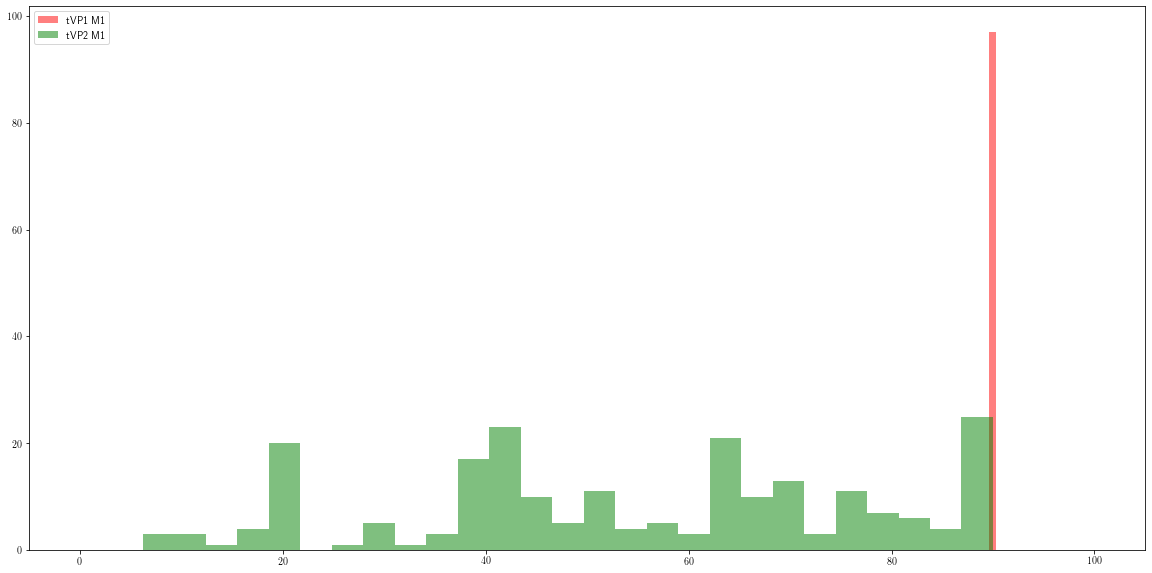

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.hist(tVP1_m1_x_drifted_ano['Accuracy_x_ano_drifted'],bins=np.linspace(80,100,30), color='red', alpha=0.5, label='tVP1 M1')
_ = plt.hist(tVP2_m1_x_drifted_ano['Accuracy_x_drifted_ano'],bins=np.linspace(0,90,30), color='green', alpha=0.5, label='tVP2 M1')
plt.legend(loc='upper left')

In [31]:
import matplotlib.style

In [32]:
matplotlib.style.use('seaborn-whitegrid')

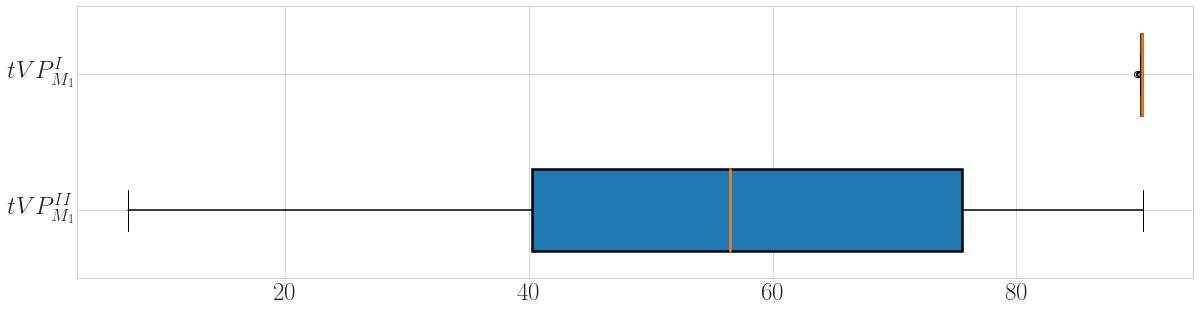

In [33]:
fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(111)

boxprops = dict(linewidth=2.5, color='black')

bp = ax.boxplot([tVP2_m1_x_drifted_ano['Accuracy_x_drifted_ano'], tVP1_m1_x_drifted_ano['Accuracy_x_ano_drifted']], boxprops=boxprops, widths=[0.6,0.6],vert=False, patch_artist=True)
_ = plt.yticks([1,2], ['$tVP^{II}_{M_1}$', '$tVP^{I}_{M_1}$'], fontsize=25)
_ = plt.xticks(fontsize=25)
#_ = plt.title('Verteilung der Accuracy der Modelle $M_1$ auf ${X}_{drifted,anormal}$ für $tVP^{I}_{M_1}$ und $tVP^{II}_{M_1}$', fontsize=28)

for box in bp['whiskers']:
    box.set(color='black', linewidth=1.5)

for median in bp['medians']:
    median.set(linewidth=2.5)
    
save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_boxplot_verteilung_accuracy.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

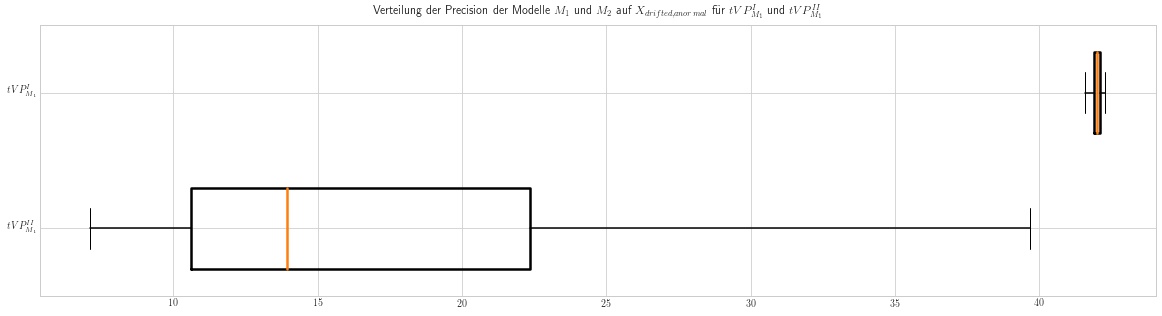

In [34]:
fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(111)

boxprops = dict(linewidth=2.5, color='black')

bp = ax.boxplot([tVP2_m1_x_drifted_ano['Precision_x_drifted_ano'], tVP1_m1_x_drifted_ano['Precision_x_ano_drifted']], boxprops=boxprops, widths=[0.6,0.6],vert=False, showfliers=False)
_ = plt.yticks([1,2], ['$tVP^{II}_{M_1}$', '$tVP^{I}_{M_1}$'])
_ = plt.title('Verteilung der Precision der Modelle $M_1$ und $M_2$ auf ${X}_{drifted,anormal}$ für $tVP^{I}_{M_1}$ und $tVP^{II}_{M_1}$')

for box in bp['whiskers']:
    box.set(color='black', linewidth=1.5)

for median in bp['medians']:
    median.set(linewidth=2.5)
    
save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_boxplot_verteilung_precision.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

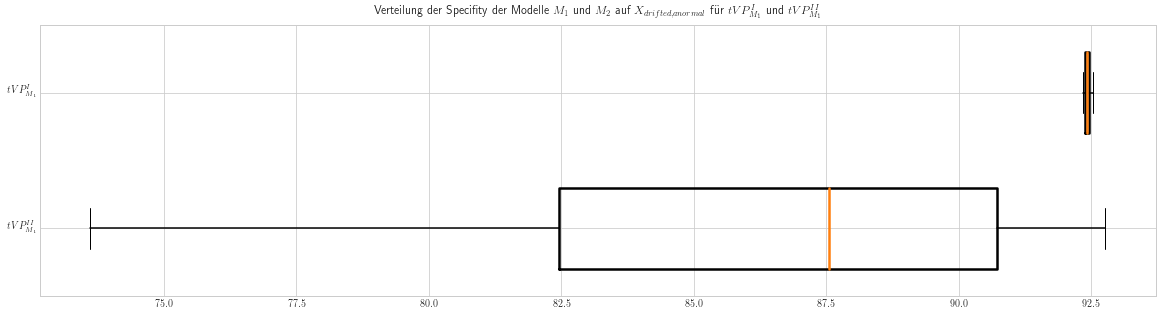

In [35]:
fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(111)

boxprops = dict(linewidth=2.5, color='black')

bp = ax.boxplot([tVP2_m1_x_drifted_ano['Specifity_x_drifted_ano'], tVP1_m1_x_drifted_ano['Specifity_x_ano_drifted']], boxprops=boxprops, widths=[0.6,0.6],vert=False, showfliers=False)
_ = plt.yticks([1,2], ['$tVP^{II}_{M_1}$', '$tVP^{I}_{M_1}$'])
_ = plt.title('Verteilung der Specifity der Modelle $M_1$ und $M_2$ auf ${X}_{drifted,anormal}$ für $tVP^{I}_{M_1}$ und $tVP^{II}_{M_1}$')

for box in bp['whiskers']:
    box.set(color='black', linewidth=1.5)

for median in bp['medians']:
    median.set(linewidth=2.5)
    
save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_boxplot_verteilung_specifity.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

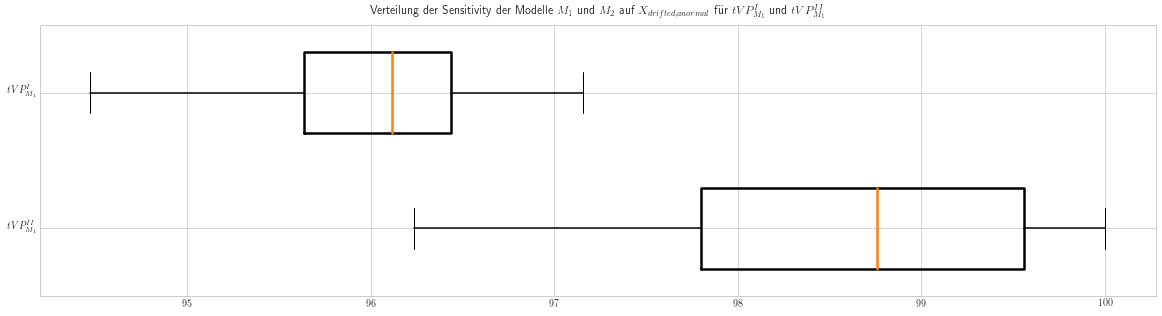

In [36]:
fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(111)

boxprops = dict(linewidth=2.5, color='black')

bp = ax.boxplot([tVP2_m1_x_drifted_ano['Sensitivity_x_drifted_ano'], tVP1_m1_x_drifted_ano['Sensitivity_x_ano_drifted']], boxprops=boxprops, widths=[0.6,0.6],vert=False, showfliers=False)
_ = plt.yticks([1,2], ['$tVP^{II}_{M_1}$', '$tVP^{I}_{M_1}$'])
_ = plt.title('Verteilung der Sensitivity der Modelle $M_1$ und $M_2$ auf ${X}_{drifted,anormal}$ für $tVP^{I}_{M_1}$ und $tVP^{II}_{M_1}$')

for box in bp['whiskers']:
    box.set(color='black', linewidth=1.5)

for median in bp['medians']:
    median.set(linewidth=2.5)
    
save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_boxplot_verteilung_sensitivity.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

## Veränderung der Modellqualität pro Modell aus Phase 1

In [37]:
df_tVP2_m1[df_tVP2_m1['name_pretrained_model'] == 1]['Precision_x_drifted_ano'].describe()

count    42.000000
mean     14.669236
std      11.449277
min       7.551335
25%       9.453121
50%      10.621249
75%      11.328056
max      42.362561
Name: Precision_x_drifted_ano, dtype: float64

In [38]:
df_tVP2_m1[df_tVP2_m1['name_pretrained_model'] == 2]['Precision_x_drifted_ano'].describe()

count    34.000000
mean     18.513724
std      11.172705
min       8.137143
25%       8.137143
50%      15.846158
75%      25.547233
max      38.001867
Name: Precision_x_drifted_ano, dtype: float64

In [39]:
df_tVP2_m1[df_tVP2_m1['name_pretrained_model'] == 3]['Precision_x_drifted_ano'].describe()

count    39.000000
mean     22.669541
std      10.714903
min       7.266748
25%      14.812217
50%      20.191198
75%      32.861986
max      40.938456
Name: Precision_x_drifted_ano, dtype: float64

In [40]:
df_tVP2_m1[df_tVP2_m1['name_pretrained_model'] == 4]['Precision_x_drifted_ano'].describe()

count    36.000000
mean     22.713629
std      11.528756
min       8.070949
25%      15.951475
50%      17.813910
75%      38.971768
max      41.070793
Name: Precision_x_drifted_ano, dtype: float64

In [41]:
df_tVP2_m1[df_tVP2_m1['name_pretrained_model'] == 5]['Precision_x_drifted_ano'].describe()

count    33.000000
mean     16.357828
std       5.560061
min       7.126142
25%      12.542597
50%      14.566651
75%      20.341952
max      26.933159
Name: Precision_x_drifted_ano, dtype: float64

In [42]:
df_tVP2_m1[df_tVP2_m1['name_pretrained_model'] == 6]['Precision_x_drifted_ano'].describe()

count    42.000000
mean     13.828177
std       7.071578
min       7.984767
25%      10.587997
50%      10.974450
75%      12.904359
max      40.775862
Name: Precision_x_drifted_ano, dtype: float64

## False Positives vor und nach dem Fine-Tuning

In [92]:
df_tVP1_m1[['TN_x_ano_drifted', 'FP_x_ano_drifted', 'FN_x_ano_drifted', 'TP_x_ano_drifted']].describe()

,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,TP_x_ano_drifted
count,97.0,97.0,97.000000,97.000000
mean,29230.0,3313.0,101.835052,2395.164948
std,0.0,0.0,22.171059,22.171059
min,29230.0,3313.0,71.000000,2277.000000
25%,29230.0,3313.0,89.000000,2388.000000
50%,29230.0,3313.0,97.000000,2400.000000
75%,29230.0,3313.0,109.000000,2408.000000
max,29230.0,3313.0,220.000000,2426.000000


In [93]:
df_tVP2_m1[['TN_x_drifted_ano', 'FP_x_drifted_ano', 'FN_x_drifted_ano', 'TP_x_drifted_ano']].describe()

,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,TP_x_drifted_ano
count,226.000000,226.000000,226.000000,226.000000
mean,17127.685841,15415.314159,39.287611,2457.712389
std,8170.875553,8170.875553,41.157168,41.157168
min,0.000000,3313.000000,0.000000,2282.000000
25%,11629.250000,8528.250000,11.000000,2442.000000
50%,17328.500000,15214.500000,31.000000,2466.000000
75%,24014.750000,20913.750000,55.000000,2486.000000
max,29230.000000,32543.000000,215.000000,2497.000000


In [94]:
cm_tVP1_m1 = [[29230, 3313],[102, 2395]]
cm_tVP2_m1 = [[17128, 15415],[39, 2458]]

In [95]:
df_cm_1 = pd.DataFrame(
        cm_tVP1_m1, index=['k. Anomalie', 'Anomalie'], columns=['k. Anomalie', 'Anomalie'], 
)

In [96]:
df_cm_2 = pd.DataFrame(
        cm_tVP2_m1, index=['k. Anomalie', 'Anomalie'], columns=['k. Anomalie', 'Anomalie'], 
)

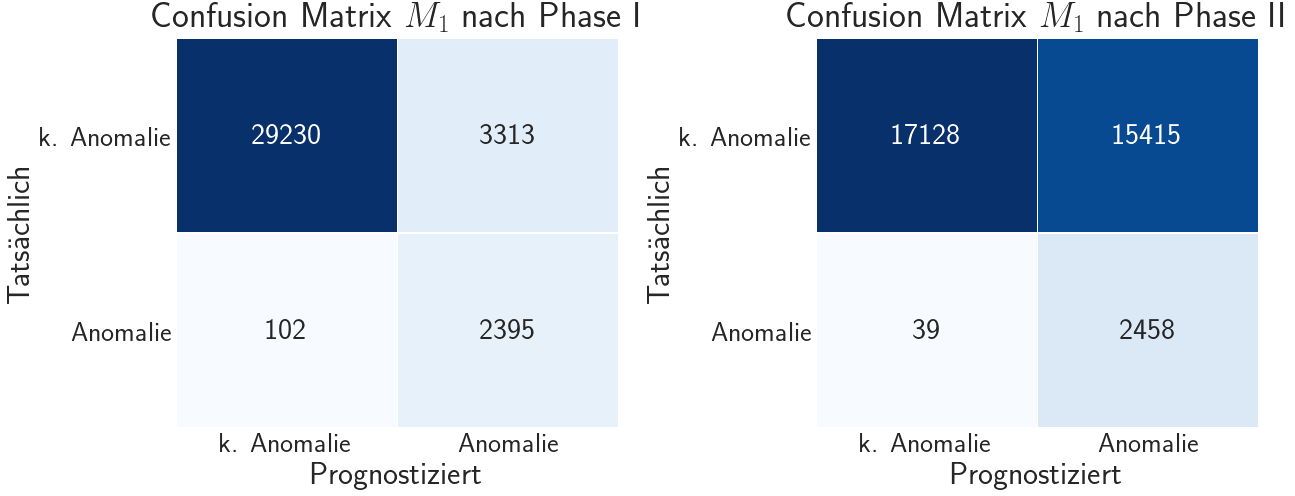

In [124]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
sns.heatmap(df_cm_1, annot=True, fmt="d",linewidths=.6,annot_kws={"size": 30},cmap='Blues', ax=ax[0], cbar=False)
sns.heatmap(df_cm_2, annot=True, fmt="d",linewidths=.6,annot_kws={"size": 30},cmap='Blues', ax=ax[1], cbar=False)

ax[0].yaxis.set_ticklabels(ax[0].yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=28)
ax[0].xaxis.set_ticklabels(ax[0].xaxis.get_ticklabels(), rotation=0, fontsize=28)

ax[1].yaxis.set_ticklabels(ax[1].yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=28)
ax[1].xaxis.set_ticklabels(ax[1].xaxis.get_ticklabels(), rotation=0,  fontsize=28)

ax[0].set_ylabel('Tatsächlich', fontsize=32)
ax[0].set_xlabel('Prognostiziert',fontsize=32)
ax[1].set_ylabel('Tatsächlich', fontsize=32)
ax[1].set_xlabel('Prognostiziert',fontsize=32)

ax[0].set_title('Confusion Matrix $M_1$ nach Phase I', fontsize=36)
ax[1].set_title('Confusion Matrix $M_1$ nach Phase II', fontsize=36)
plt.tight_layout()

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_confusion_matrices_m1.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight')